# Yelp Review Classifier
This notebook serves as a challenge to implement and explore LSTM and Convolution model over the new Yelp review dataset. You have to fill up all the blanks with the hyperparameters that helps you get the best accuracy and loss.

In [3]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.6.0


## Downloading the TensorFlow `yelp_popularity_review` dataset

> Make sure tensorflow_datasets is installed

In [4]:
##load the yelp reviews dataset
data, info = tfds.load("yelp_polarity_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/yelp_polarity_reviews/plain_text/0.1.0.incompleteNKCCO7/yelp_polarity_reviews-train.tfrecord


  0%|          | 0/560000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/yelp_polarity_reviews/plain_text/0.1.0.incompleteNKCCO7/yelp_polarity_reviews-test.tfrecord


  0%|          | 0/38000 [00:00<?, ? examples/s]

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [5]:
train_data, test_data = data['train'], data['test']

train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [6]:
for sent, label in train_data:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

for sent, label in test_data:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())


train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [7]:
##define the parameters for tokenizing and padding
vocab_size = 10000
embedding_dim = 32
max_length = 120
padding_type = 'post'
trunc_type='post'
oov_tok = "<OOV>"

In [8]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs,maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

## Explore the LSTM & CNN model with the following layers:
1. Embedding layer
2. Try two bidirectional LSTM layers or a Conv1D layer or both.
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 32)           320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 256)          164864    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 653,377
Trainable params: 653,377
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 10
history = model.fit(
    train_padded, 
    train_labels, 
    epochs=num_epochs, 
    validation_data=(test_padded, test_labels)
    )

Epoch 1/10
17500/17500 [==============================] - 434s 24ms/step - loss: 0.2063 - accuracy: 0.9155 - val_loss: 0.1461 - val_accuracy: 0.9429
Epoch 2/10
17500/17500 [==============================] - 425s 24ms/step - loss: 0.1519 - accuracy: 0.9399 - val_loss: 0.1393 - val_accuracy: 0.9475
Epoch 3/10
17500/17500 [==============================] - 432s 25ms/step - loss: 0.1307 - accuracy: 0.9490 - val_loss: 0.1346 - val_accuracy: 0.9494
Epoch 4/10
17500/17500 [==============================] - 427s 24ms/step - loss: 0.1138 - accuracy: 0.9563 - val_loss: 0.1382 - val_accuracy: 0.9495
Epoch 5/10
17500/17500 [==============================] - 433s 25ms/step - loss: 0.0976 - accuracy: 0.9633 - val_loss: 0.1442 - val_accuracy: 0.9458
Epoch 6/10
17500/17500 [==============================] - 431s 25ms/step - loss: 0.0816 - accuracy: 0.9700 - val_loss: 0.1572 - val_accuracy: 0.9438
Epoch 7/10
17500/17500 [==============================] - 435s 25ms/step - loss: 0.0668 - accuracy: 0.9756

In [13]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          20608     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 344,769
Trainable params: 344,769
Non-trainable params: 0
_________________________________________________________________


In [15]:
history_conv = model_conv.fit(
    train_padded, 
    train_labels, 
    epochs=num_epochs, 
    validation_data=(test_padded, test_labels)
    )

Epoch 1/10
17500/17500 [==============================] - 81s 3ms/step - loss: 0.2122 - accuracy: 0.9128 - val_loss: 0.1572 - val_accuracy: 0.9391
Epoch 2/10
17500/17500 [==============================] - 55s 3ms/step - loss: 0.1651 - accuracy: 0.9342 - val_loss: 0.1476 - val_accuracy: 0.9422
Epoch 3/10
17500/17500 [==============================] - 56s 3ms/step - loss: 0.1442 - accuracy: 0.9434 - val_loss: 0.1453 - val_accuracy: 0.9419
Epoch 4/10
17500/17500 [==============================] - 55s 3ms/step - loss: 0.1276 - accuracy: 0.9506 - val_loss: 0.1474 - val_accuracy: 0.9436
Epoch 5/10
17500/17500 [==============================] - 54s 3ms/step - loss: 0.1121 - accuracy: 0.9575 - val_loss: 0.1569 - val_accuracy: 0.9426
Epoch 6/10
17500/17500 [==============================] - 55s 3ms/step - loss: 0.0972 - accuracy: 0.9637 - val_loss: 0.1783 - val_accuracy: 0.9395
Epoch 7/10
17500/17500 [==============================] - 56s 3ms/step - loss: 0.0831 - accuracy: 0.9694 - val_loss: 0

## Visualise the accuracy and loss

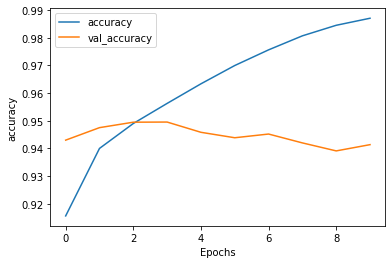

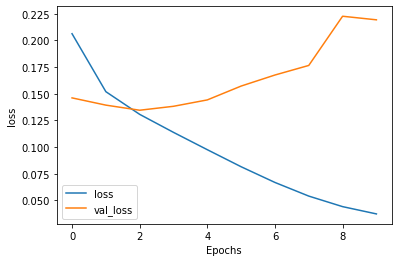

In [16]:
import matplotlib.pyplot as plt


def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
  
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

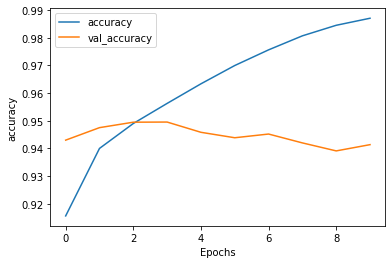

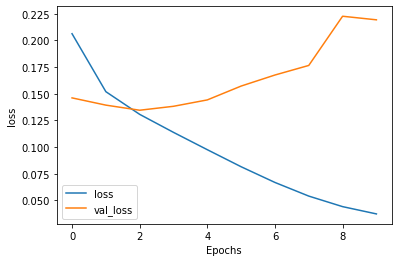

In [20]:
def plot_metrics(history_conv, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
  
plot_metrics(history_conv, "accuracy")
plot_metrics(history_conv, "loss")

## Classify new reviews

In [21]:
sentence = ["the restaurant served a delicious pasta", "the restaurant didn't have a decent ambience"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.4520536 ]
 [0.57500535]]


In [22]:
print(model_conv.predict(padded))

[[0.87196857]
 [0.6252468 ]]
